# To Do 5  
Margaret Jones (mmj32)  
pandas notes pt 2  
Due: 19 September 2017

# The Basics

In [27]:
#IMPORT
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#this checks version
pd.__version__

'0.20.1'

In [28]:
#this makes a series (data type: object)
options = pd.Series(['beef','pork','fish','chicken','vegetarian'], index = ['a','b','c','d','e'])

#get all of the values
options.values

#get all the indexes
options.index

#splicing also works - you can even use the indexes
options['b':'d']   #just remember: [inclusionary:exclusionary]

#let's just see what options is
options

a          beef
b          pork
c          fish
d       chicken
e    vegetarian
dtype: object

# Creating a DataFrame

In [29]:
slist = {'a':1,'b':2,'c':3,'d':4,'e':5}
comida = pd.Series(slist)
foods = ['banana','onion','peanut butter','salmon','bread']
df = pd.DataFrame({'Number': comida,'Food': foods})
df

,Food,Number
a,banana,1
b,onion,2
c,peanut butter,3
d,salmon,4
e,bread,5


In [30]:
#What about more columns?
exam1 = pd.Series({'Emily': 90, 'Abby': 76,'Dom': 79, 'Natalie': 97})
exam2 = pd.Series({'Emily': 96, 'Abby': 51,'Dom': 87, 'Natalie': 78})
level = pd.Series({'Emily': 3, 'Abby': 1, 'Dom': 3, 'Natalie': 1})
scores = pd.DataFrame({'Midterm':exam1, 'Final':exam2, "ASL Class Level" :level})
scores

,ASL Class Level,Final,Midterm
Abby,1,51,76
Dom,3,87,79
Emily,3,96,90
Natalie,1,78,97


In [31]:
#adding a column that averages the test scores!
scores['Average'] = (scores['Midterm'] + scores['Final']) / 2.0
scores

#you can also use .values to show without all the pretty formatting. Just an array like fashion
#or if you want to swap rows and columns, use that with .T
#You can also create a DataFrame with random values with .RandomState()

,ASL Class Level,Final,Midterm,Average
Abby,1,51,76,63.5
Dom,3,87,79,83.0
Emily,3,96,90,93.0
Natalie,1,78,97,87.5


# Working with Files

In [32]:
#this reads in a file
file = pd.read_csv('asl-background-cut_margaret.csv')

#this prints out some info about the file
file.info()

#NOTE: this isn't a real file, I made it. People's actual grades are not represented here. 
    #I got the names from friends and sitting in a Starbucks and just writing the names called out.
    #This file doens't represent real people.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
NAME       36 non-null object
YEAR       36 non-null object
LEVEL      36 non-null int64
GRADE      36 non-null object
MIDTERM    36 non-null int64
FINAL      36 non-null int64
dtypes: int64(3), object(3)
memory usage: 1.8+ KB


Things you can take from this:  
-there are no non-null cells  
-thre are 6 columns and 36 rows  
-the indexes range form 0-35  
-"Name," "Year," and "Grade" all store objects (likely strings)  
-"Level," "Midterm," and "Final" all store integers  
-the amount of memory this file takes  

In [33]:
#to access the actual contents use .loc[] or .iloc[] 
file.loc[1:10]

#shows type
type(file)

#gives the first 5 if left unspecified - this one has 20 so it will show the first 20
file.head(20) 

#gives the last 5 if left unspecified
file.tail() 

#returns some info about the data
file.info() 

#returns descriptive stats (only on the ints)
file.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
NAME       36 non-null object
YEAR       36 non-null object
LEVEL      36 non-null int64
GRADE      36 non-null object
MIDTERM    36 non-null int64
FINAL      36 non-null int64
dtypes: int64(3), object(3)
memory usage: 1.8+ KB


,LEVEL,MIDTERM,FINAL
count,36.000000,36.000000,36.000000
mean,2.444444,83.333333,89.555556
std,1.557369,8.342661,5.704356
min,1.000000,63.000000,79.000000
25%,1.000000,78.750000,86.000000
50%,3.000000,84.500000,89.500000
75%,3.000000,89.000000,94.250000
max,5.000000,97.000000,99.000000


In [34]:
#working with someone else's data...
#reading in Andrew's data
aRyan = pd.read_csv('Top_1000_Songs_To_Hear_Before_You_Die_AndrewRyan.csv')
aRyan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 5 columns):
THEME          994 non-null object
TITLE          994 non-null object
ARTIST         994 non-null object
YEAR           994 non-null int64
SPOTIFY_URL    772 non-null object
dtypes: int64(1), object(4)
memory usage: 38.9+ KB


In [35]:
aRyan.head()

,THEME,TITLE,ARTIST,YEAR,SPOTIFY_URL
0,Love,The Look of Love,ABC,1982,http://open.spotify.com/track/78j3qTBdzcIiT3eS...
1,Love,The Shining,Badly Drawn Boy,2000,http://open.spotify.com/track/2PojSoZ94AIzp7fs...
2,Love,God Only Knows,The Beach Boys,1966,http://open.spotify.com/track/0ObrXLrfrqJUNc8R...
3,Love,Good Vibrations,The Beach Boys,1966,http://open.spotify.com/track/2oF7FZHIJbzjeEXZ...
4,Love,Wouldn’t It Be Nice,The Beach Boys,1966,http://open.spotify.com/track/0cx32rX0uZvcJUP9...


In [36]:
#Let's switch up the order a bit. Year first, then title, arsits, theme, and url
aRyan = aRyan[['YEAR', 'TITLE', 'ARTIST', 'THEME', 'SPOTIFY_URL']]
#PRO TIP: you need the [['-']] to make it a dataframe and not series

#return the first 10
aRyan.head(10)

,YEAR,TITLE,ARTIST,THEME,SPOTIFY_URL
0,1982,The Look of Love,ABC,Love,http://open.spotify.com/track/78j3qTBdzcIiT3eS...
1,2000,The Shining,Badly Drawn Boy,Love,http://open.spotify.com/track/2PojSoZ94AIzp7fs...
2,1966,God Only Knows,The Beach Boys,Love,http://open.spotify.com/track/0ObrXLrfrqJUNc8R...
3,1966,Good Vibrations,The Beach Boys,Love,http://open.spotify.com/track/2oF7FZHIJbzjeEXZ...
4,1966,Wouldn’t It Be Nice,The Beach Boys,Love,http://open.spotify.com/track/0cx32rX0uZvcJUP9...
5,1964,Eight Days a Week,The Beatles,Love,NaN
6,1965,Girl,The Beatles,Love,NaN
7,1963,I Want to Hold Your Hand,The Beatles,Love,NaN
8,1963,She Loves You,The Beatles,Love,NaN
9,1969,Something,The Beatles,Love,NaN


NOTE: Some of the cells say NaN - this is esentially a blank, there are no values for these cells

In [37]:
#A few things to keep in mind:
len(aRyan['TITLE'][2])      #calculate the length for you
aRyan['SPOTIFY_URL'][6]     #this is a value that is NaN
aRyan.iloc[48]              #gives you the whole row
aRyan.iloc[48, 4]           #returns the theme of that row
aRyan.loc[48]               #technically this does't he same thing as .iloc[] above
aRyan.loc[48, 'THEME']      #access the theme of this row

'Love'

In [38]:
# How many years are represented in this data?
#len(set(aRyan['YEAR'])) #this is python's way, not pandas way

#if you need help figuring out what to do use this:
#help(aRyan['YEAR'].unique)

#this is the pandas' way to show the number of years rep!
aRyan['YEAR'].unique().size 

#if you just want to see the lears listed do this:
aRyan['YEAR'].unique()

array([1982, 2000, 1966, 1964, 1965, 1963, 1969, 1967, 1989, 1977, 1958,
       2003, 1972, 1959, 1993, 1975, 1985, 1978, 1994, 1968, 1956, 1988,
       1954, 1973, 1974, 1962, 1961, 1986, 1992, 1987, 1960, 2008, 1976,
       1984, 1939, 1971, 1979, 2007, 2001, 1995, 1928, 1970, 1955, 1996,
       1952, 1981, 1980, 1997, 2005, 1991, 2004, 2002, 2006, 1998, 1931,
       1990, 1983, 1999, 1951, 1916, 1932, 1940, 1936, 1946, 1922, 1941,
       1953, 1950, 1957, 1929, 1944, 1938, 1935, 1949])

In [39]:
#let's split this data for songs before 1982 and then songs after 2000
oldfilter = aRyan["YEAR"] == 1982
newfilter = aRyan['YEAR'] == 2000

#splice using the filter
old = aRyan.loc[oldfilter,:]
old.info()

#splice using the other filter
new = aRyan.loc[newfilter,:]
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 974
Data columns (total 5 columns):
YEAR           18 non-null int64
TITLE          18 non-null object
ARTIST         18 non-null object
THEME          18 non-null object
SPOTIFY_URL    14 non-null object
dtypes: int64(1), object(4)
memory usage: 864.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 949
Data columns (total 5 columns):
YEAR           12 non-null int64
TITLE          12 non-null object
ARTIST         12 non-null object
THEME          12 non-null object
SPOTIFY_URL    8 non-null object
dtypes: int64(1), object(4)
memory usage: 576.0+ bytes


In [40]:
#how many love themed songs?
aRyan.loc[aRyan['THEME']=="Love",:].size

695

# Visualization with Matplotlib  
See import details above with the rest of the import stuff

In [41]:
#set style
plt.style.use('classic')

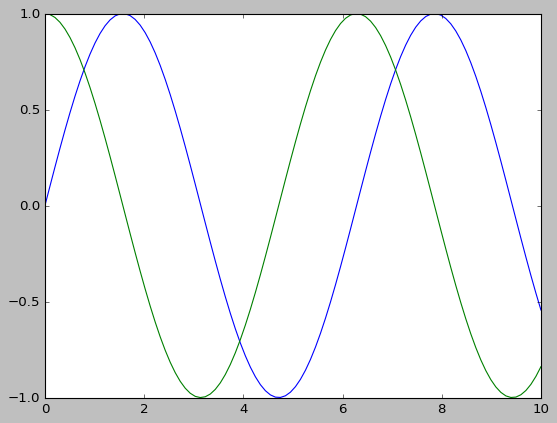

In [42]:
#make a basic graph
x = np.linspace(0, 10, 100)

#setting up sin(x) and cos(x)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

#show the pot
plt.show()

#to save this as a PNG file use this: fig.savefig('NameOfFile.png')

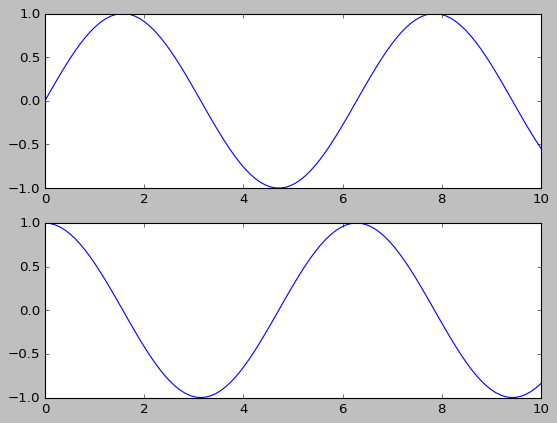

In [46]:
#create a plot figure
plt.figure()

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))

plt.show()

# Attempts at Plotting My Data  
With a scatter plot! yay!

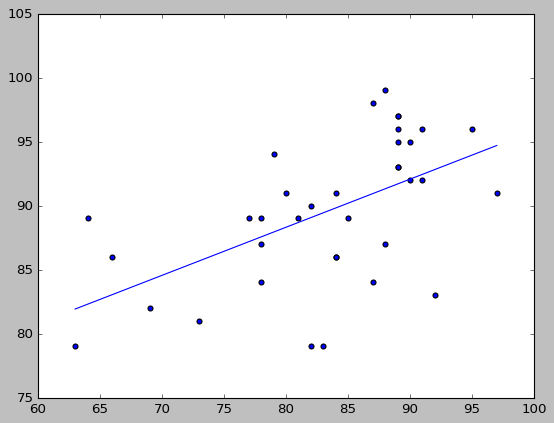

In [47]:
#scatter(x,y)
plt.scatter(file['MIDTERM'], file["FINAL"])

#creating a line of best fit (or whatever it is called)
#plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x))), where x and y are variable names
plt.plot(np.unique(file['MIDTERM']), np.poly1d(np.polyfit(file['MIDTERM'], file["FINAL"], 1))(np.unique(file['MIDTERM'])))

plt.show()